# Assignment: Data Wrangling
### `! git clone https://github.com/ds4e/wrangling`
### Do Q1 and Q2, and either Q3 or Q4, for a total of 3 questions.

**Q1.** This question provides some practice cleaning variables which have common problems.
1. Numeric variable: For `./data/airbnb_hw.csv`, clean the `Price` variable as well as you can, and explain the choices you make. How many missing values do you end up with? (Hint: What happens to the formatting when a price goes over 999 dollars, say from 675 to 1,112?)
2. Categorical variable: For the Minnesota police use of for data, `./data/mn_police_use_of_force.csv`, clean the `subject_injury` variable, handling the NA's; this gives a value `Yes` when a person was injured by police, and `No` when no injury occurred. What proportion of the values are missing? Is this a concern? Cross-tabulate your cleaned `subject_injury` variable with the `force_type` variable. Are there any patterns regarding when the data are missing? 
3. Dummy variable: For the pretrial data covered in the lecture, clean the `WhetherDefendantWasReleasedPretrial` variable as well as you can, and, in particular, replace missing values with `np.nan`.
4. Missing values, not at random: For the pretrial data covered in the lecture, clean the `ImposedSentenceAllChargeInContactEvent` variable as well as you can, and explain the choices you make. (Hint: Look at the `SentenceTypeAllChargesAtConvictionInContactEvent` variable.)

In [2]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd 

In [3]:
df = pd.read_csv('./data/airbnb_hw.csv',low_memory=False)

var = 'Price' # clean the Price variable
df[var] = df[var].str.replace("$", "") # removing $
df[var] = df[var].str.replace(",", "") # remove ,
df[var] = df[var].str.strip() # remove leading and trailing white space
df[var] = df[var].replace(["", " ", "0"], np.nan) # replace empty strings, white spaces, and 0 with NaN
print('Before coercion: \n', df[var].describe(),'\n') # The Price variable is read as an object instead of a number

# coerce Price to numeric
df[var] = pd.to_numeric(df[var], errors='coerce')
# Create a missing dummy:
df['Price_nan'] = df[var].isnull() # Equals 1 if missing, 0 if non-null
# After coercion:
print('After coercion: \n', df[var].describe(),'\n') # Describe the numeric variable
print('Total Missings: \n', sum(df['Price_nan']),'\n') # How many missing values are there?


Before coercion: 
 count     30478
unique      511
top         150
freq       1481
Name: Price, dtype: object 

After coercion: 
 count    30478.000000
mean       163.589737
std        197.785454
min         10.000000
25%         80.000000
50%        125.000000
75%        195.000000
max      10000.000000
Name: Price, dtype: float64 

Total Missings: 
 0 



I removed all commas, $, and leading and trailing white spaces as these are commonly entered in a price variable. I replace all empty strings, white spaces, and 0's with nan because these can be considered missing data (either entered nothing or a price of $0). Then I converted the object to numeric since price is dealing with numbers. There are 0 missing values. 

In [4]:
df1 = pd.read_csv('./data/mn_police_use_of_force.csv',low_memory=False)

var = 'subject_injury'
print(df1[var].unique(), '\n') # no empty string so no need for replacement
print(df1[var].value_counts(), '\n')

missing_proportion = df1[var].isna().mean()
print(missing_proportion, '\n') 

cross_tab = pd.crosstab(df1[var], df1['force_type'])
print(cross_tab, '\n')

cross_tab_missing = pd.crosstab(df1[var].isna(), df1['force_type'])
print(cross_tab_missing, '\n') 

[nan 'No' 'Yes'] 

subject_injury
Yes    1631
No     1446
Name: count, dtype: int64 

0.7619342359767892 

force_type      Baton  Bodily Force  Chemical Irritant  Firearm  \
subject_injury                                                    
No                  0          1093                131        2   
Yes                 2          1286                 41        0   

force_type      Gun Point Display  Improvised Weapon  Less Lethal Projectile  \
subject_injury                                                                 
No                             33                 34                       1   
Yes                            44                 40                       2   

force_type      Police K9 Bite  Taser  
subject_injury                         
No                           2    150  
Yes                         44    172   

force_type      Baton  Bodily Force  Chemical Irritant  Firearm  \
subject_injury                                                    
False  

Over 75% of values are missing which is an extremely significant portion of data missing, so this is a concern. Majority of the missing values come from bodily force, then chemical irritant, then taser. The missing values appear significantly more frequently for these 3 than any other force type.

In [5]:
url = 'http://www.vcsc.virginia.gov/pretrialdataproject/October%202017%20Cohort_Virginia%20Pretrial%20Data%20Project_Deidentified%20FINAL%20Update_10272021.csv'
df2 = pd.read_csv(url,low_memory=False)

In [ ]:
var = 'WhetherDefendantWasReleasedPretrial'
print(df2[var].unique(), '\n') 
df2[var] = df2[var].replace(9, np.nan) # replace all 9's w/ nan
print(df2[var].value_counts(), '\n')

[9 0 1] 

WhetherDefendantWasReleasedPretrial
1.0    19154
0.0     3801
Name: count, dtype: int64 



In [ ]:
var = 'ImposedSentenceAllChargeInContactEvent'
var1 = 'SentenceTypeAllChargesAtConvictionInContactEvent'

print(df2[var1].unique(), '\n') 
print(df2[var1].value_counts(), '\n')
tab = pd.crosstab(df2[var] == "0", df2[var1])
print(tab, '\n') 

df2[var] = df2[var].str.replace(",", "") # remove ,
df2[var] = df2[var].str.strip() # remove leading and trailing white space
df2[var] = df2[var].replace(["", " "], np.nan) # replace empty strings, white spaces with NaN
print('Before coercion: \n', df2[var].describe(),'\n') # The variable is read as an object instead of a number

# coerce to numeric
df2[var] = pd.to_numeric(df2[var], errors='coerce')
# Create a missing dummy:
df2['ImposedSentence_nan'] = df2[var].isnull() # Equals 1 if missing, 0 if non-null
# After coercion:
print('After coercion: \n', df2[var].describe(),'\n') # Describe the numeric variable
print('Total Missings: \n', sum(df2['ImposedSentence_nan']),'\n') 

[9 0 1 4 2] 

SentenceTypeAllChargesAtConvictionInContactEvent
4    8779
0    8720
1    4299
2     914
9     274
Name: count, dtype: int64 

SentenceTypeAllChargesAtConvictionInContactEvent     0     1    2     4    9
ImposedSentenceAllChargeInContactEvent                                      
False                                             3767  4299  914  8779  274
True                                              4953     0    0     0    0 

Before coercion: 
 count     13933
unique      483
top           0
freq       4953
Name: ImposedSentenceAllChargeInContactEvent, dtype: object 

After coercion: 
 count    13933.000000
mean        19.899671
std         63.571627
min          0.000000
25%          0.000000
50%          2.000000
75%         12.000000
max       2208.000000
Name: ImposedSentenceAllChargeInContactEvent, dtype: float64 

Total Missings: 
 9053 



Based on SentenceTypeAllChargesAtConvictionInContactEvent variable, the 0 in ImposedSentenceAllChargeInContactEvent variable is meaningful and shouldn't be replaced with nan. The cross table of the two variables when ImposedSentenceAllChargeInContactEvent = 0 shows that it's only 0 when the sentence type = 0. This means that 0 corresponds to SentenceType = 0, which could indicate no sentence. This is a real category, and not considered missing, so it's not replaced with nan.

I removed all commas and leading and trailing white spaces as these commonly cause errors. I replace all empty strings and white spaces with nan because these can be considered missing data (entered nothing). Then I converted the object to numeric since ImposedSentenceAllChargeInContactEvent is dealing with numbers.

**Q2.** Go to https://sharkattackfile.net/ and download their dataset on shark attacks.

1. Open the shark attack file using Pandas. It is probably not a csv file, so `read_csv` won't work.
2. Drop any columns that do not contain data.
3. Clean the year variable. Describe the range of values you see. Filter the rows to focus on attacks since 1940. Are attacks increasing, decreasing, or remaining constant over time?
4. Clean the Age variable and make a histogram of the ages of the victims.
5. What proportion of victims are male?
6. Clean the `Type` variable so it only takes three values: Provoked and Unprovoked and Unknown. What proportion of attacks are unprovoked?
7. Clean the `Fatal Y/N` variable so it only takes three values: Y, N, and Unknown.
8. Are sharks more likely to launch unprovoked attacks on men or women? Is the attack more or less likely to be fatal when the attack is provoked or unprovoked? Is it more or less likely to be fatal when the victim is male or female? How do you feel about sharks?
9. What proportion of attacks appear to be by white sharks? (Hint: `str.split()` makes a vector of text values into a list of lists, split by spaces.)

dropped column Unnamed: 21
dropped column Unnamed: 22
[2025. 2024. 2026. 2023. 2022. 2021. 2020. 2019. 2018. 2017.   nan 2016.
 2015. 2014. 2013. 2012. 2011. 2010. 2009. 2008. 2007. 2006. 2005. 2004.
 2003. 2002. 2001. 2000. 1999. 1998. 1997. 1996. 1995. 1984. 1994. 1993.
 1992. 1991. 1990. 1989. 1969. 1988. 1987. 1986. 1985. 1983. 1982. 1981.
 1980. 1979. 1978. 1977. 1976. 1975. 1974. 1973. 1972. 1971. 1970. 1968.
 1967. 1966. 1965. 1964. 1963. 1962. 1961. 1960. 1959. 1958. 1957. 1956.
 1955. 1954. 1953. 1952. 1951. 1950. 1949. 1948. 1848. 1947. 1946. 1945.
 1944. 1943. 1942. 1941. 1940. 1939. 1938. 1937. 1936. 1935. 1934. 1933.
 1932. 1931. 1930. 1929. 1928. 1927. 1926. 1925. 1924. 1923. 1922. 1921.
 1920. 1919. 1918. 1917. 1916. 1915. 1914. 1913. 1912. 1911. 1910. 1909.
 1908. 1907. 1906. 1905. 1904. 1903. 1902. 1901. 1900. 1899. 1898. 1897.
 1896. 1895. 1894. 1893. 1892. 1891. 1890. 1889. 1888. 1887. 1886. 1885.
 1884. 1883. 1882. 1881. 1880. 1879. 1878. 1877. 1876. 1875. 1874. 187

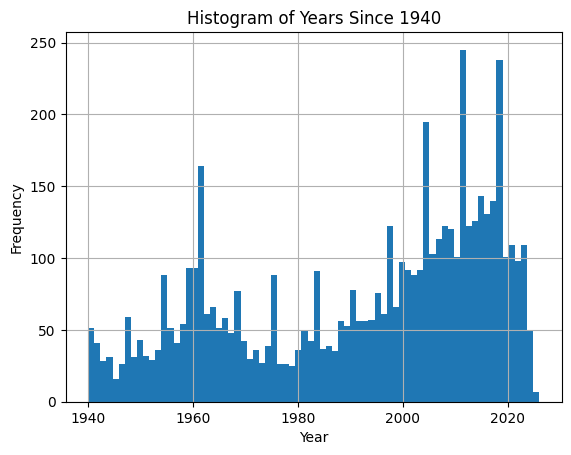

Total Missings: 
 1807 

[12. 37. 23. 40. 28. 69. 48. nan 57. 24. 45. 61. 27. 38. 16. 33. 30. 15.
 41. 14. 26. 18. 21. 49. 25. 46. 19. 20. 65. 64. 13. 11. 32. 29. 10. 62.
 39. 22. 66. 52. 44. 47. 55. 59.  8. 50. 34. 35.  9. 77. 60. 42. 73. 58.
 67. 17.  6. 53. 68. 43. 51. 31. 56. 36.  7. 71. 54. 75. 70.  4. 63. 74.
  3. 82. 72.  5. 86. 84. 87.  1.  2. 81. 78.]
Age
17.0    164
15.0    142
19.0    138
20.0    138
18.0    136
       ... 
87.0      1
1.0       1
2.0       1
81.0      1
78.0      1
Name: count, Length: 82, dtype: int64


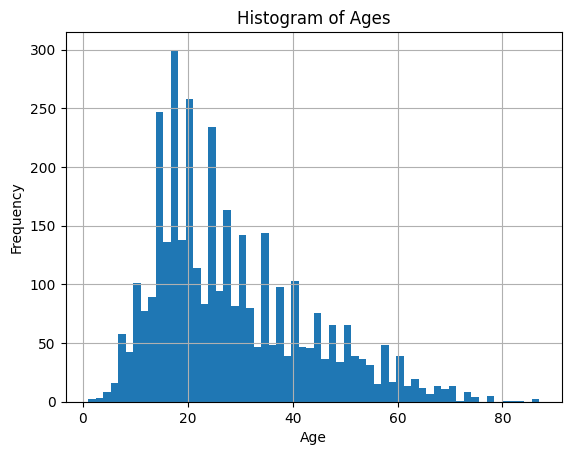

['M' 'F' nan ' M' 'M ' 'lli' 'M x 2'] 

Sex
M    4298
F     706
Name: count, dtype: int64 

male proportion: 0.8589128697042366 

['Unprovoked' 'Provoked' ' Provoked' 'Questionable' 'Watercraft'
 'Sea Disaster' nan '?' 'Unconfirmed' 'Unverified' 'Invalid'
 'Under investigation' 'Boat'] 

(4599, 22) 

Type
Unprovoked             4055
Provoked                518
Questionable             22
?                         1
Unconfirmed               1
Unverified                1
Under investigation       1
Name: count, dtype: int64 

unprovoked proportion: 0.8817134159599913 

['N' 'Y' 'F' 'M' nan 'n' 'Nq' 'UNKNOWN' 2017 ' N'] 

Fatal Y/N
N          3837
Y           696
UNKNOWN      39
F             4
M             2
NQ            1
Name: count, dtype: int64 

(4572, 22) 

Sex           F         M
Type                     
False  0.051037  0.121575
True   0.948963  0.878425 

Fatal Y/N                   N   UNKNOWN         Y
Type                                             
?                  

In [8]:
df3 = pd.read_excel("./data/GSAF5.xls") 


columns = df3.columns
# check proportion of missing data in columns => remove columns w/ no data
for i in columns:
    var = i
    missing_proportion = df3[var].isna().mean()
    # print(missing_proportion, '\n')

    if(missing_proportion>0.9):
        df3 = df3.drop(var, axis=1)
        print("dropped column "+i)
# print(df3.shape)


var = 'Year'
print(df3[var].unique(), '\n') 
df3[var] = df3[var].replace([1000, 77, 5, 0], np.nan)
print(df3[var].value_counts(), '\n') # range goes from 2025-1500
df3 = df3[df3[var]>=1940] # Conditional: years since 1940
print(df3.shape, '\n')
df3[var].hist(bins=74)
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.title('Histogram of Years Since 1940')
plt.show() # shark attacks are increasing over time. there are dips around 1980 and 2020, but overall it has increased

var1 = "Age"
def clean_age(age):
    if pd.isna(age):  # handle missing values
        return np.nan

    age = str(age).strip()  # remove leading/trailing whitespace

    mapping = {
        "teen": 17, "Teen": 17, "Teens": 17, 
        "mid-30s": 35, "mid-20s": 25, 
        "Elderly": 75, "a minor": 16, "adult": 30, "young": 15
    }
    if age.lower() in mapping:
        return mapping[age.lower()]

    # if there's a range then take the average
    if "to" in age or "or" in age or "&" in age or "," in age:
        numbers = [int(s.strip()) for s in age.replace("to", ",").replace("or", ",").replace("&", ",").split(",") if s.strip().isdigit()]
        return int(np.mean(numbers)) if numbers else np.nan

    if "20s" in age: return 25
    if "30s" in age: return 35
    if "40s" in age: return 45
    if "50s" in age: return 55
    if "60s" in age: return 65

    if "½" in age:
        return round(float(age.replace("½", ".5")))

    # Convert numeric strings to integer
    return int(age) if age.isdigit() else np.nan
df3[var1] = df3[var1].apply(clean_age)
df3[var1] = pd.to_numeric(df3[var1], errors='coerce')
df3['Age_nan'] = df3[var1].isnull()
print('Total Missings: \n', sum(df3['Age_nan']), '\n')
print(df3[var1].unique())
print(df3[var1].value_counts())
df3[var1].hist(bins=60)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of Ages')
plt.show()


var2 = "Sex"
print(df3[var2].unique(), '\n') 
df3[var2] = df3[var2].str.strip() # remove leading and trailing white space
df3[var2] = df3[var2].replace(["lli", "M x 2"], np.nan)
print(df3[var2].value_counts(), '\n')
total = df3[var2].value_counts().sum()
male = df3[var2].value_counts().get("M")
male_proportion = male / total
print("male proportion: " + str(male_proportion), '\n')


var3 = "Type"
print(df3[var3].unique(), '\n') 
df3[var3] = df3[var3].str.strip()
validTypes = ["Provoked", "Unprovoked", "Questionable", "?", "Unconfirmed", "Unverified", "Under investigation"]
df3 =  df3[df3[var3].isin(validTypes)] # Conditional: provoked, unprovoked, unknown
print(df3.shape, '\n')
print(df3[var3].value_counts(), '\n')
totalTypes = df3[var3].value_counts().sum()
unprovoked = df3[var3].value_counts().get("Unprovoked")
unprovoked_proportion = unprovoked / totalTypes
print("unprovoked proportion: " + str(unprovoked_proportion), '\n')


var4 = "Fatal Y/N"
print(df3[var4].unique(), '\n') 
df3[var4] = df3[var4].str.upper()
df3[var4] = df3[var4].str.strip()
print(df3[var4].value_counts(), '\n')
validFatal = ["Y", "N", "UNKNOWN"]
df3 =  df3[df3[var4].isin(validFatal)] # Conditional: Y, N, unknown
print(df3.shape, '\n')


tab1 = pd.crosstab(df3[var3] == "Unprovoked", df3[var2], normalize="columns")
print(tab1, '\n') 
# the proportion of unprovoked attacks is higher for women, so sharks are more likely to launch unprovoked attacks on women

tab2 = pd.crosstab(df3[var3], df3[var4], normalize="index")
print(tab2, '\n')
# the proportion of nonfatal attacks is higher for provoked, so the attack is less likely to be fatal when it's provoked
# the proportion of fatal attacks is higher for unprovoked, so the attack is more likely to be fatal when it's unprovoked

tab3 = pd.crosstab(df3[var2], df3[var4], normalize="index")
print(tab3, '\n')
# the proportion of nonfatal attacks is higher for female, so the attack is less likely to be fatal when it's female
# the proportion of fatal attacks is higher for male, so the attack is more likely to be fatal when it's male


var5 = "Species "
df3[var5] = df3[var5].str.lower()
whiteSharks = df3[var5].str.contains("white").sum()
totalSharks = len(df3)
whiteSharks_proportion = whiteSharks / totalSharks
print("white sharks proportion: " + str(whiteSharks_proportion), '\n')

**Q3.** Open the "tidy_data.pdf" document in the repo, which is a paper called Tidy Data by Hadley Wickham.

  1. Read the abstract. What is this paper about?
  2. Read the introduction. What is the "tidy data standard" intended to accomplish?
  3. Read the intro to section 2. What does this sentence mean: "Like families, tidy datasets are all alike but every messy dataset is messy in its own way." What does this sentence mean: "For a given dataset, it’s usually easy to figure out what are observations and what are variables, but it is surprisingly difficult to precisely define variables and observations in general."
  4. Read Section 2.2. How does Wickham define values, variables, and observations?
  5. How is "Tidy Data" defined in section 2.3?
  6. Read the intro to Section 3 and Section 3.1. What are the 5 most common problems with messy datasets? Why are the data in Table 4 messy? What is "melting" a dataset?
  7. Why, specifically, is table 11 messy but table 12 tidy and "molten"?
  8. Read Section 6. What is the "chicken-and-egg" problem with focusing on tidy data? What does Wickham hope happens in the future with further work on the subject of data wrangling?

**Q4.** Many important datasets contain a race variable, typically limited to a handful of values often including Black, White, Asian, Latino, and Indigenous. This question looks at data gathering efforts on this variable by the U.S. Federal government.

1. How did the most recent US Census gather data on race?
2. Why do we gather these data? What role do these kinds of data play in politics and society? Why does data quality matter?
3. Please provide a constructive criticism of how the Census was conducted: What was done well? What do you think was missing? How should future large scale surveys be adjusted to best reflect the diversity of the population? Could some of the Census' good practices be adopted more widely to gather richer and more useful data?
4. How did the Census gather data on sex and gender? Please provide a similar constructive criticism of their practices.
5. When it comes to cleaning data, what concerns do you have about protected characteristics like sex, gender, sexual identity, or race? What challenges can you imagine arising when there are missing values? What good or bad practices might people adopt, and why?
6. Suppose someone invented an algorithm to impute values for protected characteristics like race, gender, sex, or sexuality. What kinds of concerns would you have?